# Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')

In [3]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [4]:
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.243984
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.962684


In [5]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.000000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.000000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.000000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.000000


In [6]:
data_users

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
...,...,...,...,...,...,...,...
539,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,15-24,4452.188395
540,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,25-34,363.461965
541,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,35-44,214.023515
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763


# Data Exploration

## data_senior

In [7]:
# data collected between Apr 2019 and March 2020

<function matplotlib.pyplot.show(close=None, block=None)>

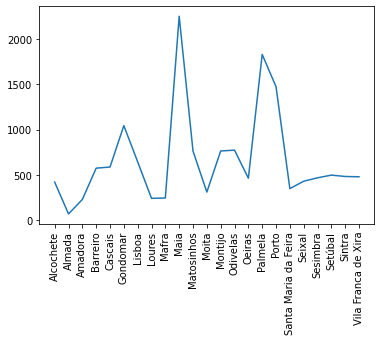

In [8]:
plot = data_senior[['County_of_Origin', "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
plt.plot(plot)
plt.xticks(rotation='vertical')
plt.show

# we can see the counties with the greatest average daily senior population travelling as a mean 
# the data_senior includes various means of transportation including foot, cars, buses etc...

In [60]:
data_senior['County_of_Origin'].unique() #23 counties

array(['Lisboa', 'Palmela', 'Oeiras', 'Vila Franca de Xira', 'Sintra',
       'Barreiro', 'Seixal', 'Almada', 'Amadora', 'Mafra', 'Odivelas',
       'Sesimbra', 'Maia', 'Loures', 'Porto', 'Gondomar', 'Setúbal',
       'Cascais', 'Montijo', 'Santa Maria da Feira', 'Matosinhos',
       'Moita', 'Alcochete'], dtype=object)

## data_users

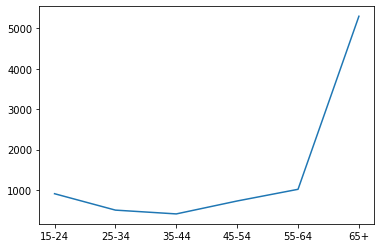

In [10]:
plt.plot(data_users.groupby("AgeClassDescription").mean()) #there is an average of 5'000 daily bus usage for seniors

## data_od

In [11]:
data_od['Dicofre_ParishCode_of_Public_Transportation'].nunique() #100 parishes
#unique identifier for each Parish 
#It is designated DICOFRE in portuguese, related with de first terms of the words DIstrito, COncelho, FREguesia
#refers to destination

100

In [12]:
data_od[['Dicofre_ParishCode_of_Public_Transportation']]
#parish=freguesia FRE (six numbers); 
#municipality=concelho (first 4 numbers) CO; district=distrito DI (first two numbers) from DICOFRE

,Dicofre_ParishCode_of_Public_Transportation
0,110608
1,110639
2,110658
3,110654
4,110633
...,...
2248,150315
2249,130414
2250,111608
2251,150313


In [13]:
data_od[['County_of_Origin','Demand_weight']].groupby('County_of_Origin').sum()
# The demand weight is normalized per county. 
#This means that the sum of all the demand weights with the same county of origin will be around 1

,Demand_weight
County_of_Origin,
Alcochete,1.000004
Almada,1.000006
Amadora,1.000006
Barreiro,1.000002
Cascais,0.999999
Espinho,1.000001
Gondomar,1.000001
Lisboa,0.999998
Loures,1.000000


## Transporlis - Lisbon : Data Exploration 

In [14]:
org_transporlis = ['carris','carristur','cp','fertagus','metro_de_lisboa','metro_transportes_do_sul',
                   'sul_fertagus','transtejo_soflusa','tst']

In [15]:
files = ['agency','calendar','calendar_dates','frequencies','routes','shapes','stop_times','stops','trips']

In [16]:
df_transporlis = [pd.read_csv(f"transporlis_data/data_{org}/{f}.txt") for org in org_transporlis for f in files]

In [17]:
df_transporlis # data for all transportation companies into simple list of dataframes

[   agency_id agency_name            agency_url agency_timezone agency_lang  \
 0          1      Carris  http://www.carris.pt   Europe/Lisbon          pt   
 
    agency_phone  
 0           NaN  ,
        service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
 0        27581474       1        1          1         1       1         0   
 1        27581484       1        1          1         1       1         0   
 2        27581489       1        1          1         1       1         0   
 3        27581544       1        1          1         1       1         0   
 4        27581494       1        1          1         1       1         0   
 ...           ...     ...      ...        ...       ...     ...       ...   
 12992    27592493       0        0          0         0       0         0   
 12993    27592971       1        1          1         1       1         0   
 12994    27592796       1        1          1         1       1         0   
 12995    27593132   

In [18]:
df_transporlis[18]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,CP,https://www.cp.pt/,Europe/Lisbon,pt,NaN


In [19]:
df_transporlis = [df_transporlis[x:x+9] for x in range(0, len(df_transporlis))]
# seperating the the list of dfs into list of list of dfs

In [20]:
df_transporlis[0] #list of dfs for Carris for example

[   agency_id agency_name            agency_url agency_timezone agency_lang  \
 0          1      Carris  http://www.carris.pt   Europe/Lisbon          pt   
 
    agency_phone  
 0           NaN  ,
        service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
 0        27581474       1        1          1         1       1         0   
 1        27581484       1        1          1         1       1         0   
 2        27581489       1        1          1         1       1         0   
 3        27581544       1        1          1         1       1         0   
 4        27581494       1        1          1         1       1         0   
 ...           ...     ...      ...        ...       ...     ...       ...   
 12992    27592493       0        0          0         0       0         0   
 12993    27592971       1        1          1         1       1         0   
 12994    27592796       1        1          1         1       1         0   
 12995    27593132   

## PORDATA: Data Exploration

### Population by age range by county

In [66]:
df_pop_raw = pd.read_csv('county_data/PORDATA_Estimativas-a-31-12-por-grupo-etário.csv',dtype=None)

In [67]:
df_pop_raw = df_pop_raw.iloc[0:353,:40]
df_pop_raw

,Âmbito Geográfico,Regions,Total: 2001,Total : 2019,0-4,0-4.1,5-9,5-9.1,10-14,10-14.1,...,65-69,65-69.1,70-74,70-74.1,75-79,75-79.1,80-84,80-84.1,85 ou mais,85 ou mais.1
0,NUTS 2013,Portugal,"10,394,669","10,295,909","556,833","436,202","548,114","455,843","574,545","504,940",...,"539,287","622,912","456,817","549,591","354,378","432,058","209,569","353,254","162,366","322,609"
1,NUTS I,Continente,"9,904,113","9,798,859","525,390","415,473","515,492","432,930","539,279","477,944",...,"518,165","597,684","439,307","530,304","341,074","417,242","201,811","342,218","156,406","313,522"
2,NUTS II,Norte,"3,696,333","3,575,338","211,121","138,522","213,563","145,676","224,421","167,426",...,"168,103","218,242","140,778","182,316","106,234","136,239","62,413","112,356","46,052","99,632"
3,NUTS III,Alto Minho,"250,491","230,412","11,676","7,784","12,438","8,234","13,688","9,839",...,"15,261","14,333","13,158","12,748","10,505","10,936","6,555","10,251","5,059","10,104"
4,Município,Arcos de Valdevez,"24,657","20,926",944,563,996,657,"1,206",774,...,"1,927","1,329","1,687","1,338","1,427","1,282",931,"1,343",721,"1,515"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Município,Santa Cruz,"31,028","45,281","2,060","1,968","2,054","2,236","2,127","2,809",...,"1,127","1,817",905,"1,301",708,974,415,716,329,523
349,Município,Santana,"8,722","6,711",391,205,446,189,509,261,...,624,418,502,353,341,343,199,282,126,277
350,Município,São Vicente,"6,185","5,143",302,140,337,139,406,218,...,441,272,358,264,242,266,145,225,113,280
351,NUTS III,Ilha de Porto Santo,"4,573","5,202",244,172,260,239,309,256,...,191,240,131,157,68,134,41,110,37,68


In [68]:
counties = data_senior['County_of_Origin'].unique()
counties

array(['Lisboa', 'Palmela', 'Oeiras', 'Vila Franca de Xira', 'Sintra',
       'Barreiro', 'Seixal', 'Almada', 'Amadora', 'Mafra', 'Odivelas',
       'Sesimbra', 'Maia', 'Loures', 'Porto', 'Gondomar', 'Setúbal',
       'Cascais', 'Montijo', 'Santa Maria da Feira', 'Matosinhos',
       'Moita', 'Alcochete'], dtype=object)

In [69]:
counties_pop = df_pop_raw[df_pop_raw['Regions'].isin(counties)].drop(columns = 'Âmbito Geográfico')
counties_pop.set_index('Regions',inplace=True)

In [70]:
counties_pop_sen = counties_pop.drop(columns = counties_pop.iloc[:,2:26])
counties_pop_sen

,Total: 2001,Total : 2019,60-64,60-64.1,65-69,65-69.1,70-74,70-74.1,75-79,75-79.1,80-84,80-84.1,85 ou mais,85 ou mais.1
Regions,,,,,,,,,,,,,,
Gondomar,"164,844","165,985","7,202","11,845","6,379","10,555","5,042","8,755","3,574","6,222","1,928","4,450","1,418","3,364"
Maia,"121,699","138,971","5,068","8,743","4,525","7,801","3,541","6,617","2,467","4,512","1,421","3,339",955,"2,631"
Matosinhos,"168,149","175,357","7,818","12,716","7,102","11,850","5,782","9,977","4,124","7,023","2,308","5,024","1,761","3,884"
Porto,"261,132","216,606","15,090","15,753","14,908","15,790","13,834","15,193","10,873","11,280","6,493","9,409","5,071","10,044"
Santa Maria da Feira,"136,555","138,636","5,888","9,668","5,362","8,182","4,153","6,743","2,980","4,771","1,621","3,856","1,265","3,079"
Alcochete,"13,415","19,787",708,924,659,857,541,834,448,691,224,476,184,447
Almada,"162,322","169,039","9,700","11,037","9,335","10,469","7,767","9,777","5,390","7,876","2,936","6,144","2,339","5,111"
Amadora,"176,027","184,106","10,462","11,324","9,399","11,186","7,100","10,936","4,714","8,780","2,489","6,460","1,561","5,890"
Barreiro,"79,037","75,147","5,195","4,830","4,353","5,194","3,351","5,565","2,564","4,459","1,432","3,105","1,103","1,767"


In [59]:
counties_pop_sen.drop([col for col in counties_pop_sen.columns if '.' in col],axis=1,inplace=True)
counties_pop_sen
#population data for all counties in data_senior

,Total: 2001,Total : 2019,60-64,65-69,70-74,75-79,80-84,85 ou mais
Regions,,,,,,,,
Gondomar,"164,844","165,985","7,202","6,379","5,042","3,574","1,928","1,418"
Maia,"121,699","138,971","5,068","4,525","3,541","2,467","1,421",955
Matosinhos,"168,149","175,357","7,818","7,102","5,782","4,124","2,308","1,761"
Porto,"261,132","216,606","15,090","14,908","13,834","10,873","6,493","5,071"
Santa Maria da Feira,"136,555","138,636","5,888","5,362","4,153","2,980","1,621","1,265"
Alcochete,"13,415","19,787",708,659,541,448,224,184
Almada,"162,322","169,039","9,700","9,335","7,767","5,390","2,936","2,339"
Amadora,"176,027","184,106","10,462","9,399","7,100","4,714","2,489","1,561"
Barreiro,"79,037","75,147","5,195","4,353","3,351","2,564","1,432","1,103"


### Aging Index per county

In [112]:
df_age_raw = pd.read_csv('county_data/PORDATA_aging_index_counties.csv',dtype=None)
df_age_raw.set_index('Regions')

,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Regions,,,,,,,,,,,,
Gondomar,62.7,86.2,91.1,96.9,102.5,108.9,116.1,124.1,132.1,139.8,147.4,154.2
Maia,59.5,72.3,75.5,79.4,83.8,89.2,94.9,100.6,106.5,112.1,117.3,122.4
Matosinhos,76.4,99.9,105.2,111.3,116.9,123.4,130.4,137.3,143.8,149.3,154.4,159.6
Porto,145.8,181.0,188.3,195.9,201.9,207.5,213.7,219.9,222.5,221.9,220.7,218.8
Santa Maria da Feira,59.9,84.4,88.9,94.1,98.6,103.9,110.4,117.9,125.4,132.6,140.2,148.0
Alcochete,93.6,75.7,76.1,77.3,78.8,81.1,84.0,87.6,91.5,94.3,97.0,100.4
Almada,118.0,122.0,126.4,130.6,133.8,138,141.9,145.5,148.5,151.1,153.6,155.1
Amadora,93.0,126.3,130.0,132.7,135.6,139,142.3,145.3,147.6,149.0,149.8,149.7
Barreiro,121.5,140.8,146.9,151.6,154.3,158.5,164.5,170.2,175.4,180.8,185.4,189.8


### Elderly Dependency Index - Where are there more and less elderly people per 100 people of working age?

In [138]:
df_eld_dep_raw = pd.read_csv('county_data/PORDATA_early_dependence_index.csv',dtype=None)
df_eld_dep_raw

,Regions,1960,1981,2001,2011
0,Portugal,12.7,18.2,24.2,28.8
1,Continente,12.8,18.1,24.4,29.2
2,Norte,11.8,16,20.4,25.2
3,Alto Minho,16.4,23.7,30.7,36.4
4,Arcos de Valdevez,17.2,28.4,44.4,53.4
...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN


In [139]:
df_eld_dep = df_eld_dep_raw[df_eld_dep_raw['Regions'].isin(counties)]

In [140]:
df_eld_dep.set_index('Regions',inplace=True)
df_eld_dep

,1960,1981,2001,2011
Regions,,,,
Gondomar,9,11.2,15.3,21.5
Maia,9.1,12,14.6,19.2
Matosinhos,8.7,11.8,17.1,23.2
Porto,11.9,18.1,28.7,35.7
Santa Maria da Feira,10.6,11.8,15.7,21.3
Alcochete,12.4,16.3,22.5,21.7
Almada,7.2,11.8,24.2,31.7
Amadora,-,9,19.7,28.1
Barreiro,9.7,11.8,22.2,33.7


### Single Person Families - where are more and less people living alone? Where are more elderly people living alone?

In [143]:
df_single_fam_raw = pd.read_csv('county_data/PORDATA_single_person_families.csv',dtype=None)
df_single_fam_raw

,Regions,Total: 1981,Total: 2001,Total: 2011,65+ :1981,65+ : 2001,65+ :2011
0,Portugal,"379,245","631,762","866,827","196,978","321,054","406,942"
1,Continente,"366,382","611,627","834,680","190,015","310,860","393,590"
2,Norte,"92,810","159,894","228,923","52,115","84,003","109,884"
3,Alto Minho,"9,160","13,098","17,241","5,446","8,088","9,983"
4,Arcos de Valdevez,"1,636","1,959","2,285","1,025","1,346","1,513"
...,...,...,...,...,...,...,...
348,Santa Cruz,670,"1,067","2,537",399,504,755
349,Santana,315,578,746,157,375,486
350,São Vicente,275,460,555,167,268,318
351,Ilha de Porto Santo,79,185,472,38,67,130


In [144]:
df_single_fam = df_single_fam_raw[df_single_fam_raw['Regions'].isin(counties)]

In [145]:
df_single_fam.set_index('Regions',inplace=True)
df_single_fam

,Total: 1981,Total: 2001,Total: 2011,65+ :1981,65+ : 2001,65+ :2011
Regions,,,,,,
Gondomar,"2,272","5,797","9,466","1,223","2,725","4,132"
Maia,"1,312","4,595","8,439",708,"1,793","2,939"
Matosinhos,"3,198","8,102","14,004","1,468","3,350","5,157"
Porto,"15,647","25,480","30,736","6,423","11,069","13,329"
Santa Maria da Feira,"1,763","4,297","6,529","1,040","2,252","3,132"
Alcochete,461,835,"1,402",253,416,571
Almada,"4,584","11,955","18,544","1,625","5,112","7,846"
Amadora,"5,935","14,556","20,119","1,397","5,095","7,948"
Barreiro,"2,290","5,297","8,113","1,064","2,618","3,804"


### Population Density - where are there more and less people, on average, per km 2 ?

In [158]:
df_pop_dense_raw = pd.read_csv('county_data/PORDATA_population_density.csv',dtype=None)
df_pop_dense_raw

,Regions,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Portugal,112.5,114.6,114.7,114.5,114,113.4,112.8,112.3,112,111.7,111.5,111.5
1,Continente,110.9,112.9,112.9,112.7,112.3,111.6,111,110.6,110.3,110,109.8,109.9
2,Norte,173.2,174.3,173.8,173.4,172.7,171.7,170.7,169.7,168.9,168.2,167.9,167.9
3,Alto Minho,112.7,111.4,110.9,110.3,109.6,108.7,107.7,106.9,105.9,105,104.4,104
4,Arcos de Valdevez,55.2,52,51.5,51,50.4,49.8,49.2,48.6,48,47.4,47,46.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_pop_dense = df_pop_dense_raw[df_pop_dense_raw['Regions'].isin(counties)]
df_pop_dense = df_pop_dense.iloc[:353].set_index('Regions')
df_pop_dense

,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Regions,,,,,,,,,,,,
Gondomar,"1,250.30","1,276.80","1,276.20","1,276.10","1,275.50","1,272.30","1,267.90","1,263.40","1,259.20","1,255.90","1,255.50","1,256.90"
Maia,"1,450.80","1,606.50","1,621.00","1,634.30","1,638.40","1,638.30","1,637.10","1,635.70","1,636.90","1,644.40","1,654.80","1,668.10"
Matosinhos,"2,704.60","2,810.70","2,810.20","2,815.40","2,813.10","2,803.70","2,793.50","2,783.50","2,777.90","2,780.30","2,788.60","2,801.50"
Porto,"6,310.50","5,877.20","5,785.80","5,686.90","5,560.00","5,429.60","5,317.20","5,224.60","5,175.00","5,175.10","5,189.20","5,213.50"
Santa Maria da Feira,632.5,646.5,646.1,647.2,648.7,648.8,647.7,646.4,644.7,642.7,641.9,641.9
Alcochete,99.3,131.3,135,138.2,140.6,142.5,144.4,145.9,147.3,149.2,151.1,153.1
Almada,"2,296.60","2,455.70","2,473.20","2,477.00","2,462.60","2,442.50","2,427.80","2,427.00","2,421.20","2,417.40","2,414.90","2,414.10"
Amadora,"7,375.50","7,372.30","7,366.40","7,376.10","7,386.50","7,378.40","7,385.10","7,413.70","7,460.30","7,529.70","7,604.40","7,692.00"
Barreiro,"2,466.90","2,170.40","2,170.00","2,163.80","2,150.50","2,131.80","2,115.70","2,105.10","2,094.10","2,084.30","2,076.60","2,068.80"


### Habitants per pharmacy and per doctors

In [164]:
df_hab_per_health_raw = pd.read_csv('county_data/PORDATA_habitants_per_pharmacy_doctors.csv',dtype=None)
df_hab_per_health_raw

,Regions,Doctors: 2001,Doctors: 2019,Pharmacists: 2001,Pharmacists: 2019
0,Portugal,311.8,185.6,"1,365.30",742.5
1,Continente,305.2,183.2,"1,328.70",730
2,Norte,351.2,186.2,"1,816.80",871.1
3,Alto Minho,523.2,254.1,"2,381.70",857.6
4,Arcos de Valdevez,"1,234.30",476.1,"4,114.30",837.9
...,...,...,...,...,...
348,Santa Cruz,561.1,326.2,"3,787.60","1,667.10"
349,Santana,"4,374.80","1,346.10","2,916.50","1,346.10"
350,São Vicente,"2,059.50",857.8,"2,059.50","1,286.60"
351,Ilha de Porto Santo,"4,517.50",518.9,"1,129.40","2,594.50"


In [165]:
df_hab_per_health = df_hab_per_health_raw[df_hab_per_health_raw['Regions'].isin(counties)]
df_hab_per_health = df_hab_per_health.iloc[:353].set_index('Regions')
df_hab_per_health

,Doctors: 2001,Doctors: 2019,Pharmacists: 2001,Pharmacists: 2019
Regions,,,,
Gondomar,441.8,234.2,"2,785.30","1,167.70"
Maia,281.5,149.4,"2,464.10",941.1
Matosinhos,188.8,106.8,"1,691.20",767
Porto,69,43.3,433.8,284.9
Santa Maria da Feira,901.3,333.9,"2,430.20",997
Alcochete,942.2,322.1,"3,297.80",755.6
Almada,299.2,213.7,"1,390.50",698.4
Amadora,316.8,319.8,914.2,650.9
Barreiro,424.5,286.2,"1,178.50",697.1


### Road accidents with victims - Where are there more and less disasters on the roads with injuries or deaths?

In [174]:
df_road_acc_raw = pd.read_csv('county_data/PORDATA_road_accidents.csv',dtype=None)
df_road_acc_raw

,Regions,1987,2019
0,Portugal,x,x
1,Continente,"38,656","35,704"
2,Norte,"12,153","12,850"
3,Alto Minho,862,859
4,Arcos de Valdevez,49,73
...,...,...,...
352,Porto Santo,x,x
353,NaN,NaN,NaN
354,NaN,NaN,NaN
355,NaN,NaN,NaN


In [175]:
df_road_acc = df_road_acc_raw[df_road_acc_raw['Regions'].isin(counties)]
df_road_acc = df_road_acc.iloc[:353].set_index('Regions')
df_road_acc

,1987,2019
Regions,,
Gondomar,225,462
Maia,254,399
Matosinhos,439,527
Porto,"1,477","1,090"
Santa Maria da Feira,443,523
Alcochete,37,66
Almada,565,496
Amadora,374,602
Barreiro,320,190


### Environmental Expenditure - Which municipalities spend a greater or lesser percentage of expenses on the environment?

In [178]:
df_env_exp_raw = pd.read_csv('county_data/PORDATA_environment_expenditure.csv',dtype=None)
df_env_exp_raw

,Regions,2001,2018
0,Portugal,7.9,8.3
1,Continente,7.8,8.2
2,Norte,5.9,7.1
3,Alto Minho,4.9,5.3
4,Arcos de Valdevez,6.3,5.3
...,...,...,...
348,Santa Cruz,39.6,18.4
349,Santana,3.3,2.6
350,São Vicente,5,10.8
351,Ilha de Porto Santo,8,5.6


In [179]:
df_env_exp = df_env_exp_raw[df_env_exp_raw['Regions'].isin(counties)]
df_env_exp = df_env_exp.iloc[:353].set_index('Regions')
df_env_exp

,2001,2018
Regions,,
Gondomar,9.7,14.7
Maia,7.9,6.4
Matosinhos,5.2,11.0
Porto,5.9,8.5
Santa Maria da Feira,2,7.5
Alcochete,11,4.2
Almada,3.5,14.8
Amadora,7.1,12.6
Barreiro,7,7.8
